In [1]:
import sympy as sym

sym.init_printing()

## Exercise 1: Symbolic calculation

**a)** Calculate the sum $1 + \dfrac{1}{2} + \dfrac{1}{3} + \dfrac{1}{4} + \dots + \dfrac{1}{100}$ symbolically as an exact fraction, and also as a floating point number. You can use ```sympy.Sum``` function to define the sum, then use ```doit``` method to evaluate the sum symbolically, and ```evalf``` method to evaluate the sum as a floating point number.

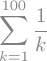

In [2]:
# We need to define all the symbols that we use in Sympy 
# For now, we define symbols x, n and k
x,n,k = sym.symbols(('x','n','k'))

# Define a sum as a sympy expression (not evaluated to any number by defaul)
expr = sym.Sum(1/k, (k,1,100))

expr

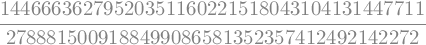

In [3]:
# We use doit() method to evaluate a sympy expression symbolically (as an exact fraction)
expr.doit()

In [4]:
# We use evalf() method to evaluate a sympy expression as a floating point number (with a certain precision)
expr.evalf()

**b)** For large $n\in\mathbb{N}$, the factorial $n!$ can be approximated with the Stirling's formula:

$$S(n) := \sqrt{2\pi n}\Bigl(\dfrac{n}{e}\Bigr)^n$$

Define $S$ as a SymPy expression and calculate the relative error given by

$$\dfrac{n! - S(n)}{n!}$$

for $n=100$ as a floating point number.

In [5]:
# We define S as a sympy expression
S = sym.sqrt(2*sym.pi*n)*(n/sym.E)**n

# Define the relative error expression
err = ((sym.factorial(n) - S)/sym.factorial(n))

# Evaluate the error at n=100 (using err.evalf(subs={n:100})) and print
print(f"The relative error at n={100} is {err.evalf(subs={n:100})}.")

The relative error at n=100 is 0.000832983432157000.


**c)** Show that the following two limits hold:

$$\lim_{n\to\infty} \dfrac{n!}{S(n)} = 1$$

$$\lim_{n\to\infty} n \Bigl( \dfrac{n!}{S(n)} - 1\Bigr) = \dfrac{1}{12}$$

To do so, define the equations above as SymPy expressions (use ```sym.Eq``` function). 

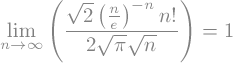

In [6]:
# Check the first limit using sympy.limit function
lhs = sym.Limit(sym.factorial(n)/S, n, sym.oo)
rhs = sym.limit(sym.factorial(n)/S, n, sym.oo)

equation = sym.Eq(lhs,rhs)

display(equation)

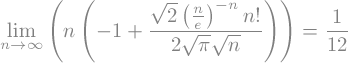

In [7]:
# Check the second limit using sympy.limit function
lhs = sym.Limit(n*(sym.factorial(n)/S - 1), n, sym.oo)
rhs = sym.limit(n*(sym.factorial(n)/S - 1), n, sym.oo)

equation = sym.Eq(lhs,rhs)

display(equation)

**d)** Define the function $f(x) = 1 - x^2$, and compute the expression of a tangent line that touches $f(x)$ at the point $x_0=(1/2,3/4)$. You can obtain the equation of the tangent line using Taylor expansion (```f.series``` method) at point $x_0$ up to the first-order term. Plot $f(x)$ together with the tangent line.

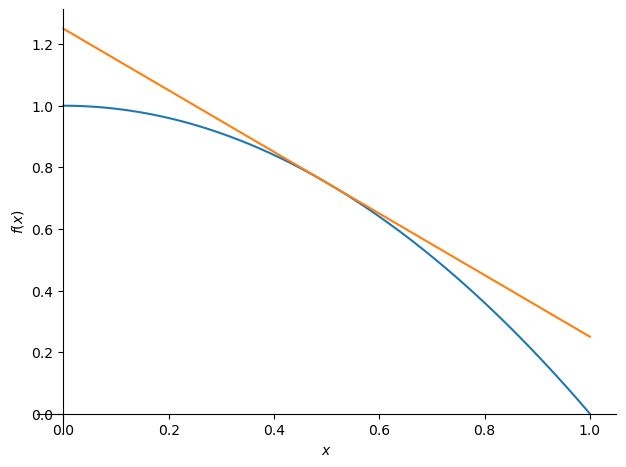

In [8]:
# We define f as a sympy expression
f = (1-x**2)

# We use f.series method with n=2 to get the first-order Taylor expansion of f at point x0
# removeO() method removes the additive O(...) symbol from the expression
tangent = f.series(x,x0=1/2, n=2).removeO()

sym.plot(f, tangent,(x,0,1))

**e)** The Gaussian density function is given by 

$$f(x) = \dfrac{1}{\sigma\sqrt{2\pi}}e^{-\dfrac{1}{2}\Bigl(\dfrac{x-\mu}{\sigma}\Bigr)^2}$$

Define $f(x)$ as a SymPy expression. Note that you need to specify that $\sigma$ is positive in the above expression. Compute the expectation and the variance of the Gaussian distribution using integrals of $x\cdot f(x)$ and $x^2 \cdot f(x)$.

In [9]:
x, mu = sym.symbols(('x', 'mu'))
sigma = sym.symbols('sigma', positive=True)

f = sym.exp(-sym.Rational(1)/sym.Rational(2)*((x-mu)/sigma)**2)/sigma/sym.sqrt(2*sym.pi)

# the expectation is mu
E = sym.integrate(x*f, (x, -sym.oo, sym.oo)).simplify()

E

In [10]:
# the variance is sigma^2
Var = sym.integrate(x**2*f, (x, -sym.oo, sym.oo)).simplify() - E**2

Var

## Exercise 2: SIS model

An alternative to the SIR model of epidemics, which we studied in Exercise 1 of week 10, is the [SIS model](https://de.wikipedia.org/wiki/SIS-Modell). In SIS model, an individual does not become immune after recovering from an infection but becomes susceptible again. Thus, there are only two states: $S$ (susceptible) and $I$ (infectious). As before, there are also two hyperparameters: infection rate $\beta$ and recovery/death rate $\gamma$. Then the differential equations system describing the model is given by

$$\dfrac{dS}{dt} = -\beta IS + \gamma I, \quad \dfrac{dI}{dt} = \beta IS - \gamma I$$

We further assume that $I+S = 1$ and denote $\delta := \beta-\gamma$. Then the above system simplifies to the following single ODE:

$$\dfrac{dI}{dt} = (\delta - \beta I) I$$

**a)** Obtain a general solution of the ODE using ```sympy.dsolve``` function. The general solution will depend on a constant $C_1$, which can be specified using initial conditions. 

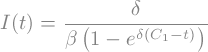

In [11]:
from sympy.abc import beta,gamma,t

delta = sym.Symbol('delta', positive=True)
I0 = sym.Symbol('I_0')

# to define the ODE in sympy, we need to define an unknown function I
I = sym.Function('I')

# define the equation
eq = sym.Eq(I(t).diff(t), (delta-beta*I(t))*I(t))

# solve the ODE using sym.dsolve
general_solution = sym.dsolve(eq,I(t))
 
# have a look at the solution
general_solution

**b)** Incorporate the initial condition $I(0) = I_0$ into the general solution. As a result, you should obtain the ODE solution as a function of $I_0$. To do this, you can compute the general solution at $t=0$ and solve the equation $I(0) = I_0$ for the constant $C_1$.

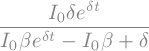

In [12]:
C = sym.Symbol('C1')

# to incorporate the initial condition, we can solve the ODE at t=0 for C1 constant
init_eq = general_solution.subs([(t,0), (I(0),I0)])
C_val = sym.solve(init_eq,C)

# then we insert the value of C1 to the general solution
ode_solution= general_solution.subs({C:C_val[0]})

# then the ODE solution for I(t) is the right hand side of the above expression
I = ode_solution.rhs.simplify()

I

# Alternatively, you can use argument ics of sym.dsolve to incorporate initial conditions (see the documentation)

**c)** Check that $1-I(t)$ satisfies the equation for $S(t)$.

In [13]:
# We simply insert the expression for 1-I(t) into the equation for S(t),
# substract RHS from LHS and check whether we get zero

# Note that gamma = beta - delta
((1-I).diff(t)+((beta)*I*(1-I)-(beta-delta)*I)).simplify().is_zero

True

**d)** The number of infectious individuals $I(t)$ will approach a stable point (equilibrium) over time. Determine the limit of $I(t)$ as $t\to\infty$. You need to consider two cases separately here: 1) $\delta>0$, 2) $\delta\leq 0$.

In [14]:
# The limit depends on the sign of delta
# Therefore, we consider two cases: delta > 0 and delta <=0

print("The limit in case delta>0:")
display(sym.limit(I,t,sym.oo))

print("The limit in case delta<=0:")
display(sym.limit(I.subs({delta:-delta}),t,sym.oo))

The limit in case delta>0:


The limit in case delta<=0:


**e)** Plot the solutions $S(t), I(t)$ over $t\in[0,100]$ for $\beta=0.4$, $\gamma=0.04$, and initial conditions $S(0)=0.997$, $I(0)=0.03$.

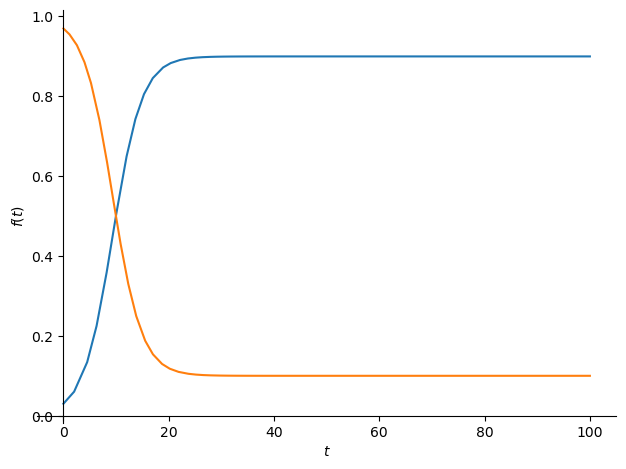

In [15]:
I_sol = ode_solution.rhs.subs({delta: 0.4-0.04, beta: 0.4, I0: 0.03})
S_sol = 1 - I_sol

sym.plot(I_sol, S_sol, (t,0,100))